In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Flatten


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train_path ="/content/drive/MyDrive/Colab Notebooks/train-20230429T125055Z-001"
val_path = "/content/drive/MyDrive/Colab Notebooks/val-20230429T125056Z-001"



In [26]:
# Setting the path to the folder which contains the 'train' folder
data_dir = train_path
# Setting the image size
size_of_img = (32, 32)
# Creating an empty list for the images and labels
images = []
labels = []
# Looping over each folder from '0' to '9'
for label in range(10):
 folder_path = os.path.join(data_dir, 'train', str(label))
 # Looping over each image in the folder
 for file in os.listdir(folder_path):
  file_path = os.path.join(folder_path, file)
  if file_path.endswith(('.tiff','.bmp')):
 # Loading the image and resizing it to the desired size
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, size_of_img)
 # Appending the image and label to the lists
    images.append(img)
    labels.append(label)
# Converting the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Saving the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)


In [27]:
# Setting the path to the folder containing the 'val' folder
val_data_dir = val_path
# Setting the image size
size_of_img_val = (32, 32)
# Creating empty lists for the images and labels
val_images = []
val_labels = []
# Looping over each folder from '0' to '9'
for label in range(10):
  folder_path = os.path.join(val_data_dir, 'val', str(label))

 # Looping over each image in the folder
  for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    if file_path.endswith(('.tiff','.bmp')):
 # Loading the image and resizing it to the desired size
      img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img, size_of_img_val)
 # Appending the image and label to the lists
      val_images.append(img)
      val_labels.append(label)
# Converting the lists to NumPy arrays
val_images = np.array(val_images)
val_labels = np.array(val_labels)
# Saving the arrays in NumPy format
np.save('x_test.npy', val_images)
np.save('y_test.npy', val_labels)

In [28]:
# Loading the dataset
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

1000
178
(1000, 32, 32)
(178, 32, 32)


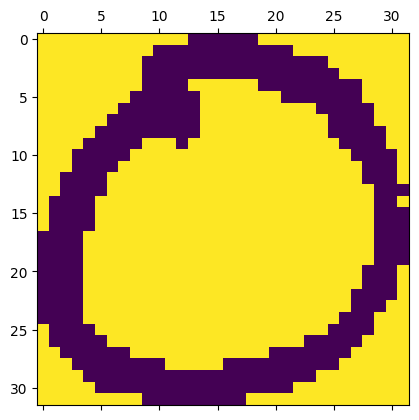

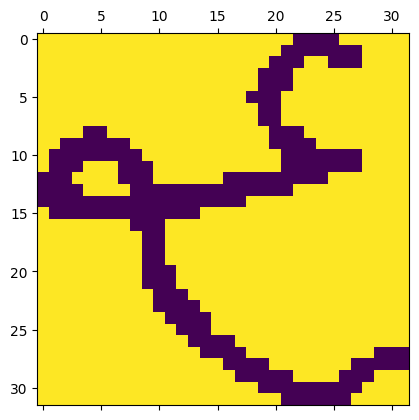

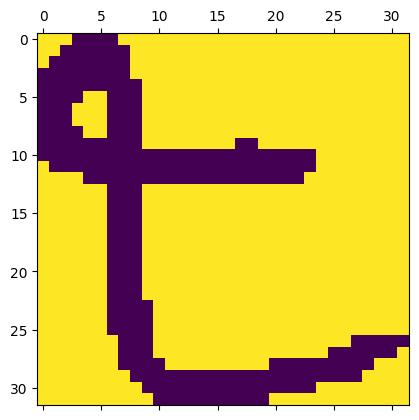

In [30]:
# testing to see if the images are loaded correctly
print(len(x_train))
print(len(x_test))
x_train[0].shape
x_train[0]
plt.matshow(x_train[0])
plt.matshow(x_train[999])
print(x_train.shape)
print(x_test.shape)
y_train
y_test
plt.matshow(x_test[150])

In [31]:
# creating a simple nn by first creating a dense layer where every input is connected to every other output.
# The number of inputs are 1000 and outputs are 10.
# activation function is sigmoid
model = keras.Sequential([
 keras.layers.Flatten(),
 keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid')
])
# compiling the nn
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
 )
# training the model
# 10 iterations are done here
model.fit(x_train, y_train,epochs= 10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 1s 14ms/step - loss: 172.9724 - accuracy: 0.3650 - val_loss: 52.4691 - val_accuracy: 0.6124
Epoch 2/10
32/32 [==============================] - 0s 7ms/step - loss: 31.9223 - accuracy: 0.7760 - val_loss: 56.2349 - val_accuracy: 0.6348
Epoch 3/10
32/32 [==============================] - 0s 6ms/step - loss: 20.6028 - accuracy: 0.8510 - val_loss: 21.5166 - val_accuracy: 0.8258
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 13.4910 - accuracy: 0.8910 - val_loss: 19.3933 - val_accuracy: 0.8202
Epoch 5/10
32/32 [==============================] - 0s 6ms/step - loss: 7.5240 - accuracy: 0.9210 - val_loss: 15.4552 - val_accuracy: 0.8596
Epoch 6/10
32/32 [==============================] - 0s 6ms/step - loss: 7.2806 - accuracy: 0.9200 - val_loss: 13.0701 - val_accuracy: 0.8933
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 3.0773 - accuracy: 0.9620 - val_loss: 13.2161 - val_accuracy: 0.8820
Epoch 8

In [32]:
# Observation : The 2nd iteration shows a better accuracy

In [33]:
# Scaling and trying to check the accuracy, dividing dataset by 255
x_train_scaled = x_train/255
x_test_scaled = x_test/255
model.fit(x_train_scaled, y_train, epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 1s 15ms/step - loss: 0.7875 - accuracy: 0.8810 - val_loss: 1.0311 - val_accuracy: 0.7528
Epoch 2/10
32/32 [==============================] - 0s 8ms/step - loss: 0.7819 - accuracy: 0.8850 - val_loss: 0.9839 - val_accuracy: 0.8090
Epoch 3/10
32/32 [==============================] - 0s 6ms/step - loss: 0.7436 - accuracy: 0.9130 - val_loss: 0.9447 - val_accuracy: 0.8258
Epoch 4/10
32/32 [==============================] - 0s 7ms/step - loss: 0.7139 - accuracy: 0.9340 - val_loss: 0.9136 - val_accuracy: 0.8371
Epoch 5/10
32/32 [==============================] - 0s 9ms/step - loss: 0.6925 - accuracy: 0.9560 - val_loss: 0.8937 - val_accuracy: 0.8764
Epoch 6/10
32/32 [==============================] - 0s 8ms/step - loss: 0.6769 - accuracy: 0.9650 - val_loss: 0.8771 - val_accuracy: 0.9045
Epoch 7/10
32/32 [==============================] - 0s 9ms/step - loss: 0.6646 - accuracy: 0.9740 - val_loss: 0.8644 - val_accuracy: 0.9157
Epoch 8/10
32/32 [=

In [34]:
# Observation : we are getting better result for all the iterations upon scaling the training dataset

In [35]:
# evaluating the test dataset
model.evaluate(x_test_scaled,y_test)


6/6 [==============================] - 0s 3ms/step - loss: 0.8397 - accuracy: 0.9213


[0.8397443890571594, 0.9213483333587646]

In [36]:
# Observation : The result is almost same as the training dataset

6/6 [==============================] - 0s 3ms/step
Predicted Value is  0
Predicted Value is  3
Predicted Value is  5


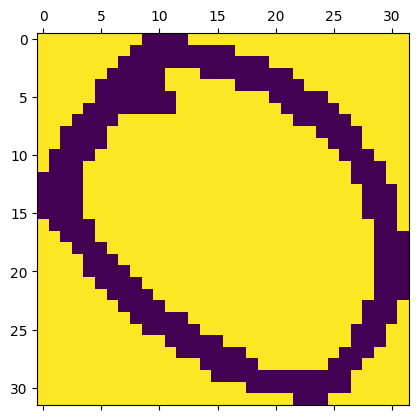

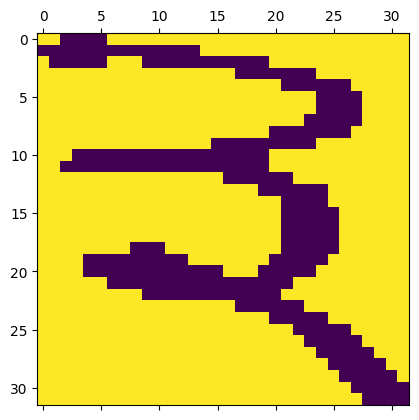

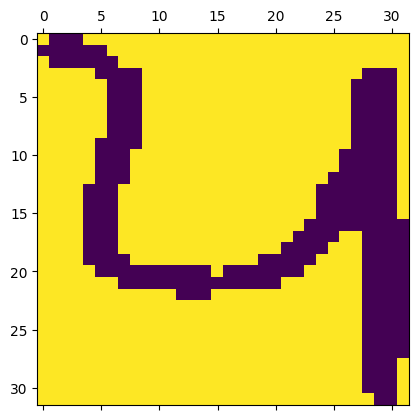

In [41]:
# predicting the 1st image
plt.matshow(x_test[0])
predicted_y = model.predict(x_test_scaled)
predicted_y[0]
# Here we get the 10 results for the input '0'. We need to look for the maximum value
print('Predicted Value is ',np.argmax(predicted_y[0]))
# testing for some more values
plt.matshow(x_test[56])
print('Predicted Value is ',np.argmax(predicted_y[56]))
plt.matshow(x_test[88])
print('Predicted Value is ',np.argmax(predicted_y[88]))

In [49]:
# some of the predictions may not be correct
# building the confusion matrix to see how our prediction may look like
# converting to concrete values
predicted_y_labels=[np.argmax(i) for i in predicted_y]
print(predicted_y_labels, len(predicted_y_labels))
conf_mtrx = tf.math.confusion_matrix(labels=y_test, predictions=predicted_y_labels)
conf_mtrx

[0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 7, 1, 7, 1, 7, 1, 7, 1, 1, 1, 1, 1, 2, 2, 5, 4, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 12,  0,  0,  0,  0,  0,  4,  0,  0],
       [ 0,  0, 14,  0,  1,  1,  0,  0,  0,  1],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

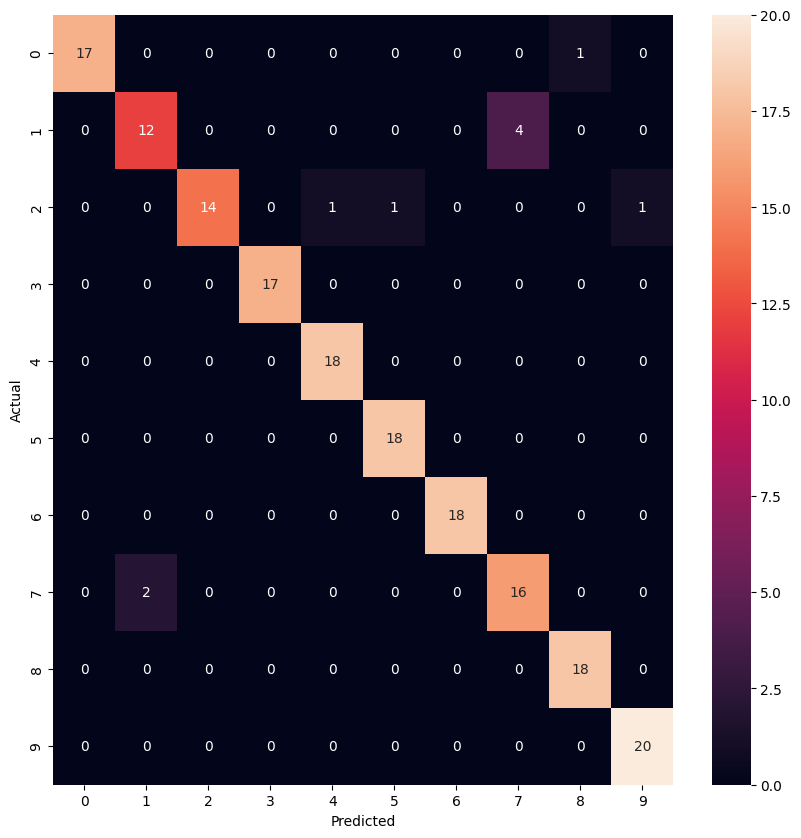

In [50]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mtrx,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [51]:
# Here we can see that some errors are present
# We need to modify our nn. We add some layers in the above model and use a different activation function

In [52]:
# In 1st Dense layer, the input is 32 x 32 = 1024 neurons, which will give 10 output(numbers from 0 to 9)
# 2nd Dense layer,the input is 10 neurons from above layers output
# we can add more layers for accuracy
model2 = keras.Sequential([
 keras.layers.Flatten(),
 keras.layers.Dense(1024,input_shape=(1024,), activation='relu'),
 keras.layers.Dense(10, activation='softmax')
])
# compiling the nn
model2.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
 )
# training the model
# 10 iterations done here
history = model2.fit(x_train_scaled, y_train, epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 2s 36ms/step - loss: 1.4870 - accuracy: 0.6430 - val_loss: 0.4495 - val_accuracy: 0.8764
Epoch 2/10
32/32 [==============================] - 1s 32ms/step - loss: 0.1718 - accuracy: 0.9550 - val_loss: 0.2448 - val_accuracy: 0.9270
Epoch 3/10
32/32 [==============================] - 1s 24ms/step - loss: 0.1031 - accuracy: 0.9760 - val_loss: 0.3161 - val_accuracy: 0.9045
Epoch 4/10
32/32 [==============================] - 1s 20ms/step - loss: 0.0889 - accuracy: 0.9800 - val_loss: 0.3335 - val_accuracy: 0.9045
Epoch 5/10
32/32 [==============================] - 1s 18ms/step - loss: 0.0694 - accuracy: 0.9830 - val_loss: 0.2284 - val_accuracy: 0.9438
Epoch 6/10
32/32 [==============================] - 1s 20ms/step - loss: 0.0315 - accuracy: 0.9930 - val_loss: 0.2431 - val_accuracy: 0.9494
Epoch 7/10
32/32 [==============================] - 1s 20ms/step - loss: 0.0209 - accuracy: 0.9990 - val_loss: 0.1964 - val_accuracy: 0.9494
Epoch 8/10
32

In [53]:
# Observation : As multiple layers are compiling, it will take more time to execute
# we also got better accuracy than before
# evaluating the test dataset based on the modified model
model2.evaluate(x_test_scaled,y_test)


6/6 [==============================] - 0s 5ms/step - loss: 0.1891 - accuracy: 0.9494


[0.18909625709056854, 0.949438214302063]

In [54]:
# Earlier we got 0.9213483333587646 now we got 0.9438202381134033 accuracy
# redoing the confusion matrix
# building a confusion matrix to see how our predictions look like
# converting to concrete values
predicted_y = model2.predict(x_test_scaled)
predicted_y[0]
predicted_y_labels=[np.argmax(i) for i in predicted_y]
print(predicted_y_labels, len(predicted_y_labels))
conf_mtrx = tf.math.confusion_matrix(labels=y_test, predictions=predicted_y_labels)
conf_mtrx


6/6 [==============================] - 0s 10ms/step
[0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 7, 1, 7, 1, 7, 1, 1, 1, 1, 1, 1, 1, 2, 2, 5, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  0, 14,  1,  1,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

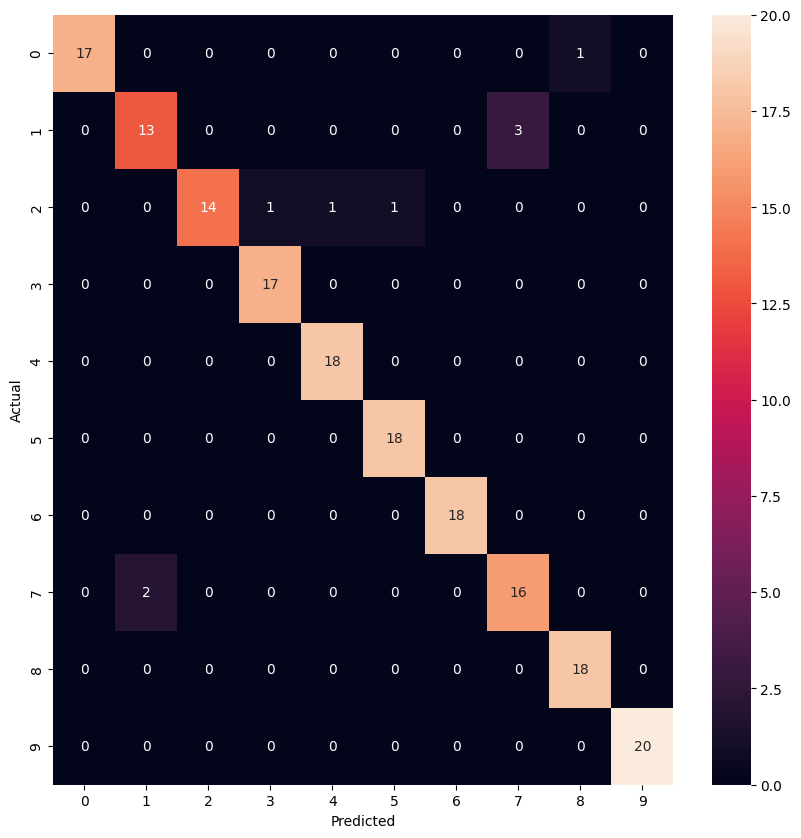

In [55]:
plt.figure(figsize = (10,10))
sn.heatmap(conf_mtrx,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

6/6 [==============================] - 0s 4ms/step - loss: 13.6286 - accuracy: 0.9045
Test accuracy: 0.9044944047927856


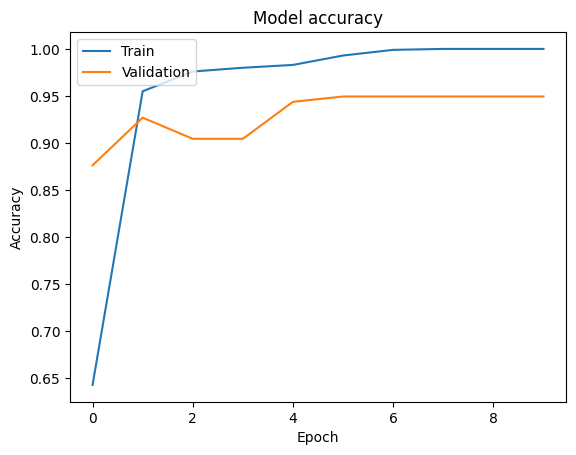

In [56]:
# Observatoin : we see in the updated model, there are less number of errors,
# whatever is not in diagonal is a error
# Evaluating the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()